### Final Project: Classification with Python

In [16]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [17]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
import piplite
await piplite.install('seaborn')

In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Datase

In [20]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [21]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [22]:
await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [23]:
df = pd.read_csv("Weather_Data.csv")

In [24]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing

#### One Hot Encoding


In [25]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [26]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

#### Training Data and Test Data

In [27]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [28]:
df_sydney_processed = df_sydney_processed.astype(float)

In [29]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

#### Linear Regression

##### Q1) Use the train_test_split function to split the features and Y dataframes with a test_size of 0.2 and the random_state set to 10

In [30]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=10)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2616, 66)
X_test shape: (655, 66)
Y_train shape: (2616,)
Y_test shape: (655,)


##### Q2) Create and train a Linear Regression model called LinearReg using the training data (x_train, y_train).

In [31]:
from sklearn.linear_model import LinearRegression

# Create the model
LinearReg = LinearRegression()

# Train the model
LinearReg.fit(X_train, Y_train)

# Display the coefficients
print("Coefficients:", LinearReg.coef_)
print("Intercept:", LinearReg.intercept_)

Coefficients: [-2.36883601e-02  1.30031554e-02  7.30154915e-04  6.49290860e-03
 -3.51614515e-02  4.23841910e-03  1.82843563e-03  7.89794445e-04
  9.55888360e-04  8.56007751e-03  7.70261345e-03 -9.24932344e-03
 -8.87528023e-03  1.00457553e-02  1.44651992e-02 -3.48325241e-03
  1.03190076e+10  1.03190076e+10 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09 -1.18315500e+10 -1.18315500e+10
 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10
 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10
 -1.1831550

##### Q3) Now use the predict method on the testing data (x_test) and save it to the array predictions

In [32]:
# Make predictions on the testing data
predictions = LinearReg.predict(X_test)

# Display the first few predictions
print(predictions[:5])

[0.13185596 0.27621174 0.97815037 0.28743076 0.13245678]


##### Q4) Using the predictions and the y_test dataframe calculate the value for each metric using the appropriate function.

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

# Display metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.1157209828234031
Mean Absolute Error (MAE): 0.256318933909176
R-squared (R2): 0.4271301272061002


##### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.

In [34]:
import pandas as pd

# dictionary withmetrics
metrics_dict = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "R-squared (R2)"],
    "Value": [mae, mse, r2]
}

# Convert dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

print(metrics_df)

                      Metric     Value
0  Mean Absolute Error (MAE)  0.256319
1   Mean Squared Error (MSE)  0.115721
2             R-squared (R2)  0.427130


### KNN

##### Q6) Create and train a KNN model called KNN using the training data (x_train, y_train) with the n_neighbors parameter set to 4

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
KNN = KNeighborsClassifier(n_neighbors=4)

# Train the model
KNN.fit(X_train, Y_train)

# Display the model parameters
print(KNN)

KNeighborsClassifier(n_neighbors=4)


##### Q7) Now use the predict method on the testing data (x_test) and save it to the array predictions.

In [36]:
# Make predictions on the testing data
predictions = KNN.predict(X_test)

# Display the first few predictions
print(predictions[:5])

[0. 0. 1. 0. 0.]


##### Q8) Using the predictions and the y_test dataframe calculate the value for each metric using the appropriate function.

In [37]:
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score

# Calculate metrics
jaccard = jaccard_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
logloss = log_loss(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)

# Display the metrics
print("Jaccard Score:", jaccard)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

Jaccard Score: 0.4251207729468599
F1 Score: 0.5966101694915255
Log Loss: 6.548388936343421
Confusion Matrix:
 [[448  23]
 [ 96  88]]
Accuracy Score: 0.8183206106870229


### Decision Tree

##### Q9) Create and train a Decision Tree model called Tree using the training data (x_train, y_train).

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model
Tree = DecisionTreeClassifier()

# Train the model
Tree.fit(X_train, Y_train)

# Display the model parameters
print(Tree)

DecisionTreeClassifier()


##### Q10) Now use the predict method on the testing data (x_test) and save it to the array predictions

In [39]:
# Make predictions on the testing data
predictions = Tree.predict(X_test)

# Display the first few predictions
print(predictions[:5])

[0. 0. 1. 0. 0.]


##### Q11) Using the predictions and the y_test dataframe calculate the value for each metric using the appropriate function

In [40]:
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score

# Calculate metrics
jaccard = jaccard_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
logloss = log_loss(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)

# Displaymetrics
print("Jaccard Score:", jaccard)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

Jaccard Score: 0.4037735849056604
F1 Score: 0.5752688172043011
Log Loss: 8.69449959615345
Confusion Matrix:
 [[390  81]
 [ 77 107]]
Accuracy Score: 0.7587786259541984


### Logistic Regression

##### Q12) Use the train_test_split function to split the features and Y dataframes with a test_size of 0.2 and the random_state set to 1

In [41]:
from sklearn.model_selection import train_test_split

# Splitdata
X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2616, 66)
X_test shape: (655, 66)
Y_train shape: (2616,)
Y_test shape: (655,)


##### Q13) Create and train a LogisticRegression model called LR using the training data (x_train, y_train) with the solver parameter set to liblinea

In [42]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
LR = LogisticRegression(solver='liblinear')

# Train the model
LR.fit(X_train, Y_train)

# Display the model parameters
print(LR)

LogisticRegression(solver='liblinear')


##### Q14) Now, use the predict and predict_proba methods on the testing data (x_test) and save it as 2 arrays predictions and predict_proba.

In [43]:
# Make predictions on the testing data
predictions = LR.predict(X_test)

# Get the probability estimates for the testing data
predict_proba = LR.predict_proba(X_test)

# Display the first few predictions and probability estimates
print("Predictions:", predictions[:5])
print("Probability Estimates:\n", predict_proba[:5])

Predictions: [0. 0. 0. 0. 0.]
Probability Estimates:
 [[0.73237141 0.26762859]
 [0.97552763 0.02447237]
 [0.53317815 0.46682185]
 [0.85161636 0.14838364]
 [0.96854679 0.03145321]]


##### Q15) Using the predictions, predict_proba and the y_test dataframe calculate the value for each metric using the appropriate function.

In [28]:
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score

# Calculate metrics
jaccard = jaccard_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
logloss = log_loss(Y_test, predict_proba)
conf_matrix = confusion_matrix(Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)

# Display metrics
print("Jaccard Score:", jaccard)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

Jaccard Score: 0.511520737327189
F1 Score: 0.676829268292683
Log Loss: 0.38103765010675233
Confusion Matrix:
 [[438  35]
 [ 71 111]]
Accuracy Score: 0.8381679389312977


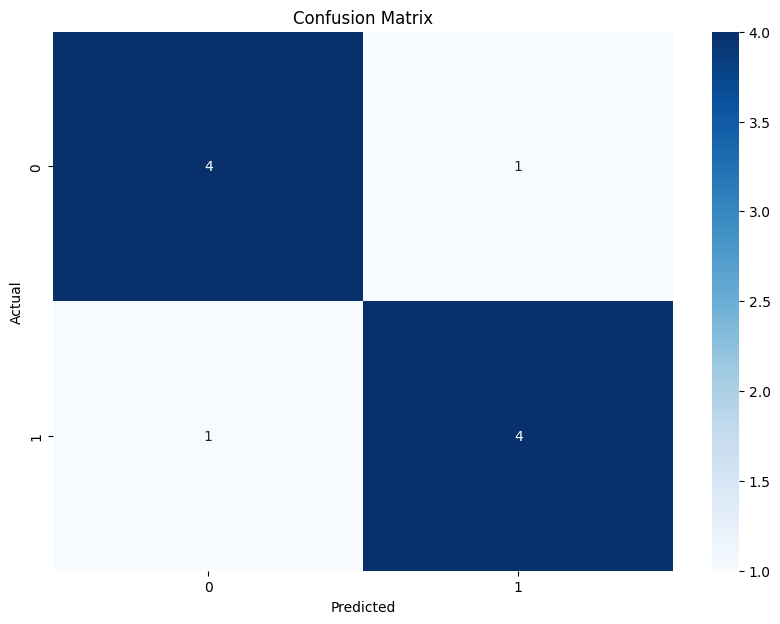

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Exemple de données : étiquettes réelles et étiquettes prédites
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### SVM

##### Q16) Create and train a SVM model called SVM using the training data (x_train, y_train)

In [31]:
from sklearn import svm

# Create the SVM model-(Support Vector Classifier)
SVM = svm.SVC()

# Train the model
SVM.fit(X_train, Y_train)

# Display the model parameters
print(SVM)

SVC()


##### Q17) Now use the predict method on the testing data (x_test) and save it to the array predictions.

In [32]:
# Make predictions on the testing data
predictions = SVM.predict(X_test)

# Display the first few predictions
print(predictions[:5])

[0. 0. 0. 0. 0.]


##### Q18) Using the predictions and the y_test dataframe calculate the value for each metric using the appropriate function.

In [33]:
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score

# Calculate metrics
jaccard = jaccard_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
logloss = log_loss(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)

# Display the metrics
print("Jaccard Score:", jaccard)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

Jaccard Score: 0.0
F1 Score: 0.0
Log Loss: 10.125240036026804
Confusion Matrix:
 [[471   0]
 [184   0]]
Accuracy Score: 0.7190839694656489


In [34]:
print("SVM_Accuracy_Score =", accuracy)
print("SVM_JaccardIndex =", jaccard)
print("SVM_F1_Score =", f1)

SVM_Accuracy_Score = 0.7190839694656489
SVM_JaccardIndex = 0.0
SVM_F1_Score = 0.0


##### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models

In [41]:
import pandas as pd
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already calculated these metrics for each model
# Replace the following values with your actual calculated metrics

# For Linear Regression (regression metrics)
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)


# For classification models
KNN_Accuracy = accuracy_score(Y_test, KNN.predict(X_test))
KNN_JaccardIndex = jaccard_score(Y_test, KNN.predict(X_test))
KNN_F1_Score = f1_score(Y_test, KNN.predict(X_test))
KNN_LogLoss = log_loss(Y_test, KNN.predict_proba(X_test))

Tree_Accuracy = accuracy_score(Y_test, Tree.predict(X_test))
Tree_JaccardIndex = jaccard_score(Y_test, Tree.predict(X_test))
Tree_F1_Score = f1_score(Y_test, Tree.predict(X_test))
Tree_LogLoss = log_loss(Y_test, Tree.predict_proba(X_test))

LR_Accuracy = accuracy_score(Y_test, LR.predict(X_test))
LR_JaccardIndex = jaccard_score(Y_test, LR.predict(X_test))
LR_F1_Score = f1_score(Y_test, LR.predict(X_test))
LR_LogLoss = log_loss(Y_test, LR.predict_proba(X_test))

jaccard = jaccard_score(Y_test, predictions)#SVM_JaccardIndex
f1 = f1_score(Y_test, predictions)#SVM_F1_Score
logloss = log_loss(Y_test, predictions)#SVM_LogLoss
conf_matrix = confusion_matrix(Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)#SVM_Accuracy


# Create a dictionary with tmetrics
metrics_dict = {
    "Model": ["Linear Regression", "KNN", "Decision Tree", "Logistic Regression", "SVM"],
    "MSE": [mse, None, None, None, None],
    "MAE": [mae, None, None, None, None],
    "R2": [r2, None, None, None, None],
    "Accuracy": [None, KNN_Accuracy, Tree_Accuracy, LR_Accuracy, SVM_Accuracy],
    "Jaccard Index": [None, KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex],
    "F1-Score": [None, KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
    "Log Loss": [None, KNN_LogLoss, Tree_LogLoss, LR_LogLoss, logloss]
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
print(metrics_df)

                 Model       MSE       MAE        R2  Accuracy  Jaccard Index  \
0    Linear Regression  0.280916  0.280916 -0.390658       NaN            NaN   
1                  KNN       NaN       NaN       NaN  0.818321       0.425121   
2        Decision Tree       NaN       NaN       NaN  0.749618       0.385768   
3  Logistic Regression       NaN       NaN       NaN  0.838168       0.518182   
4                  SVM       NaN       NaN       NaN  0.719084       0.000000   

   F1-Score   Log Loss  
0       NaN        NaN  
1  0.596610   2.292757  
2  0.556757   9.024670  
3  0.682635   0.357721  
4  0.000000  10.125240  


## ppt : Visualize the built model accuracy for all built classification models, in a bar chart



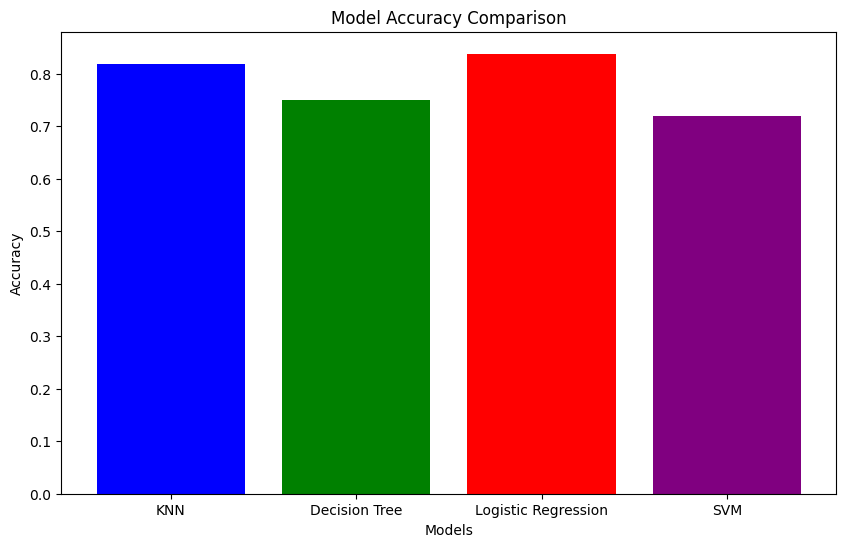

In [1]:
import matplotlib.pyplot as plt

# Data for the bar chart
models = ["KNN", "Decision Tree", "Logistic Regression", "SVM"]
accuracies = [0.818321, 0.749618, 0.838168, 0.719084]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the bar chart
plt.show()

## ppt: Show the confusion matrix of the best performing model with an explanation 


In [53]:
### show logistic regression above 